In [82]:
import pandas as pd
from isochrones.mist.bc import MISTBolometricCorrectionGrid

In [2]:
bc_grid = MISTBolometricCorrectionGrid(['J', 'H', 'K', 'G', 'BP', 'RP', 'g', 'r', 'i'])

In [3]:
bc_grid.df.head()

/home/alex/miniconda3/envs/isochrones/lib/python3.11/site-packages/tables/attributeset.py:459: NaturalNameWarning: object name is not a valid Python identifier: 'axis1_name[Fe/H]'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


J         H         K         G        BP  \
Teff   logg [Fe/H] Av                                                       
2500.0 -4.0 -4.0   0.00  1.845781  2.927064  3.436304 -2.181987 -4.652549   
                   0.05  1.831466  2.917990  3.430463 -2.211638 -4.697705   
                   0.10  1.817153  2.908916  3.424623 -2.241241 -4.742843   
                   0.15  1.802841  2.899842  3.418782 -2.270798 -4.787964   
                   0.20  1.788530  2.890769  3.412942 -2.300307 -4.833067   

                               RP         g         r         i  
Teff   logg [Fe/H] Av                                            
2500.0 -4.0 -4.0   0.00 -0.881256 -6.534742 -3.332877 -1.617626  
                   0.05 -0.909058 -6.590469 -3.375570 -1.650338  
                   0.10 -0.936830 -6.646182 -3.418258 -1.683043  
                   0.15 -0.964572 -6.701881 -3.460939 -1.715740  
                   0.20 -0.992286 -6.757566 -3.503615 -1.748429

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df = bc_grid.df.reset_index()

/home/alex/miniconda3/envs/isochrones/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


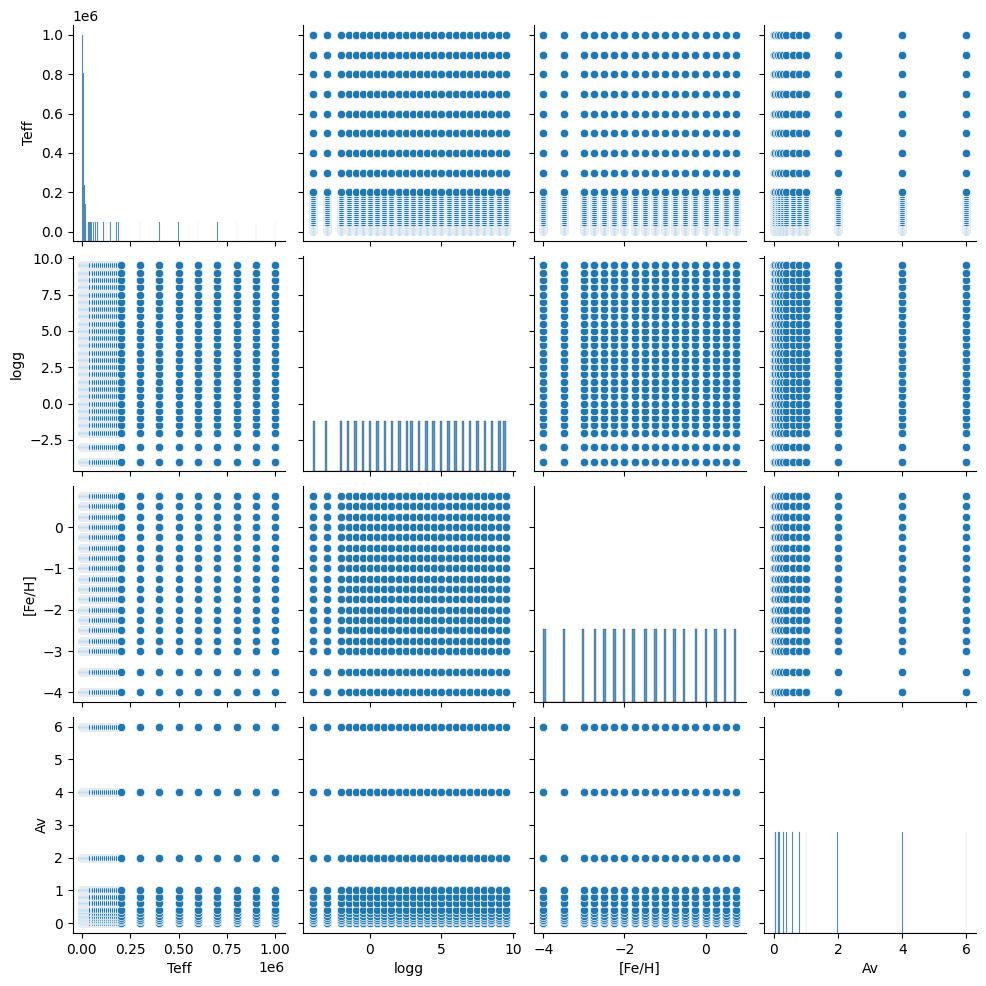

In [15]:
sns.pairplot(df, vars=["Teff", "logg", "[Fe/H]", "Av"]);

/home/alex/miniconda3/envs/isochrones/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


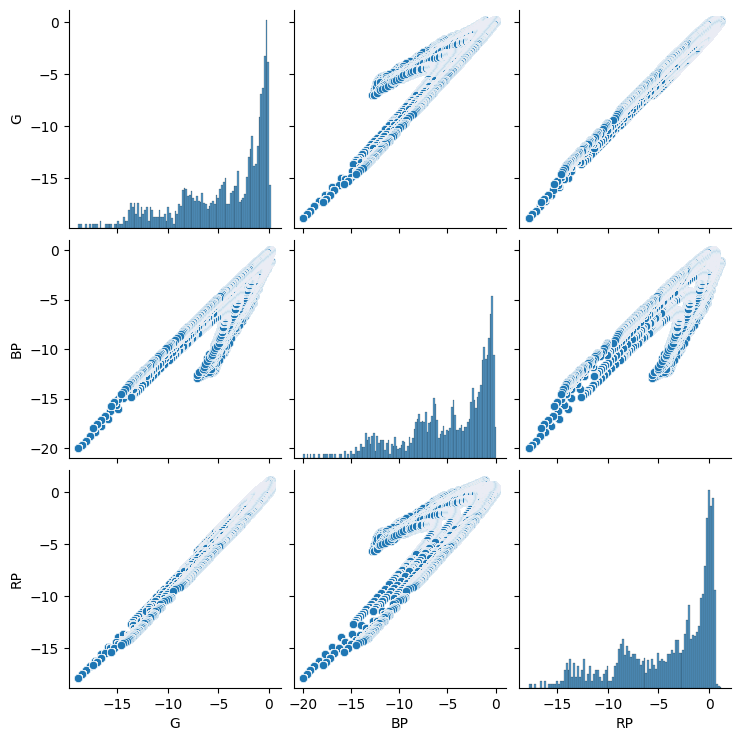

In [14]:
sns.pairplot(df, vars=["G", "BP", "RP"]);

In [49]:
mask = (df['Teff'] < 2e4) & (df['logg'] > 2) & (df['logg'] < 6) & (df['[Fe/H]'] > -1) & (df['Av'] < 2)

In [50]:
df.loc[mask]

,Teff,logg,[Fe/H],Av,J,H,K,G,BP,RP,g,r,i
2717,2500.0,2.5,-0.75,0.00,2.060398,2.639860,3.002975,-1.991365,-5.242927,-0.625698,-5.637413,-4.568194,-1.400539
2718,2500.0,2.5,-0.75,0.05,2.046009,2.630782,2.997152,-2.019406,-5.293596,-0.652348,-5.696952,-4.611316,-1.432710
2719,2500.0,2.5,-0.75,0.10,2.031621,2.621704,2.991329,-2.047406,-5.344184,-0.678977,-5.756448,-4.654431,-1.464876
2720,2500.0,2.5,-0.75,0.15,2.017235,2.612627,2.985506,-2.075366,-5.394691,-0.705585,-5.815901,-4.697541,-1.497035
2721,2500.0,2.5,-0.75,0.20,2.002850,2.603550,2.979684,-2.103285,-5.445118,-0.732172,-5.875311,-4.740644,-1.529188
...,...,...,...,...,...,...,...,...,...,...,...,...,...
241480,19000.0,5.5,0.75,0.30,-2.303521,-2.355423,-2.403468,-2.026746,-1.925213,-2.118498,-1.861904,-2.183569,-2.447663
241481,19000.0,5.5,0.75,0.40,-2.332726,-2.373775,-2.415273,-2.128151,-2.044439,-2.185879,-1.985719,-2.272163,-2.515660
241482,19000.0,5.5,0.75,0.60,-2.391117,-2.410474,-2.438880,-2.328813,-2.281386,-2.320206,-2.232891,-2.449264,-2.651562
241483,19000.0,5.5,0.75,0.80,-2.449485,-2.447165,-2.462485,-2.526617,-2.516345,-2.453953,-2.479451,-2.626248,-2.787342


/home/alex/miniconda3/envs/isochrones/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


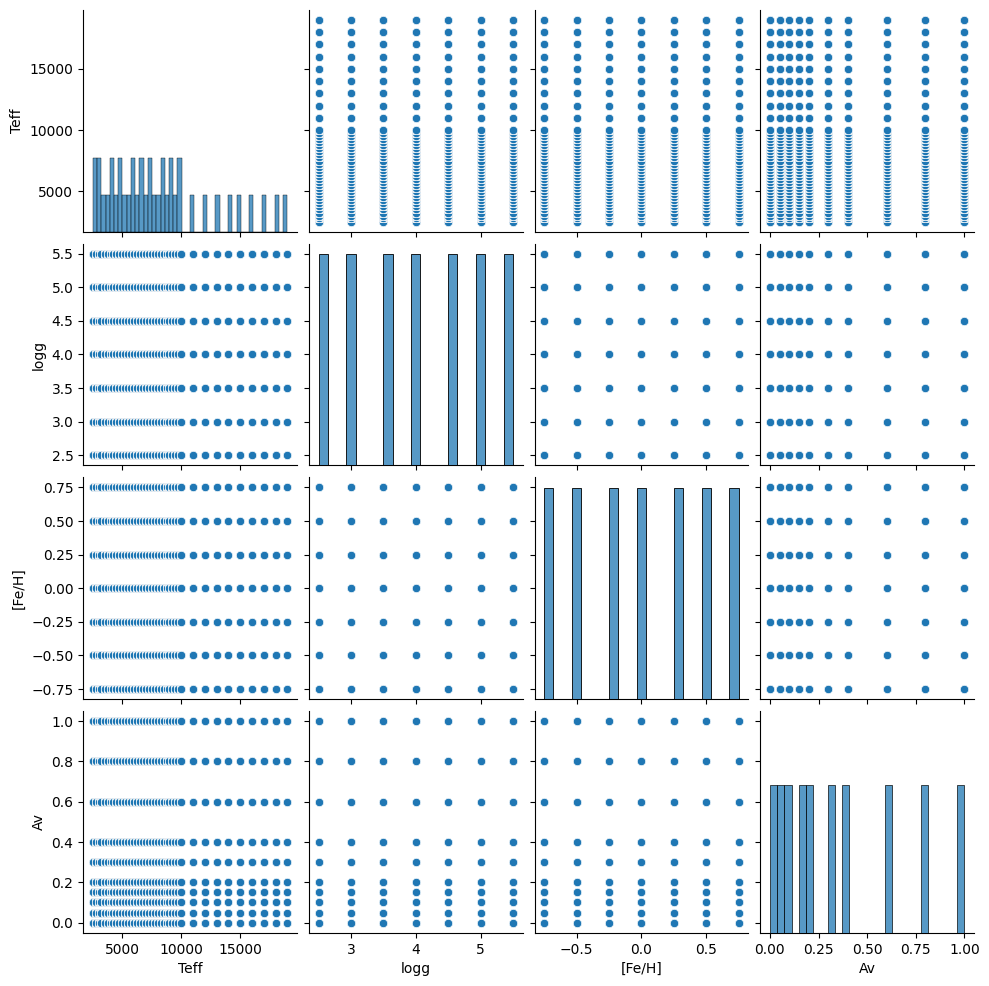

In [51]:
sns.pairplot(df.loc[mask], vars=["Teff", "logg", "[Fe/H]", "Av"]);

/home/alex/miniconda3/envs/isochrones/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


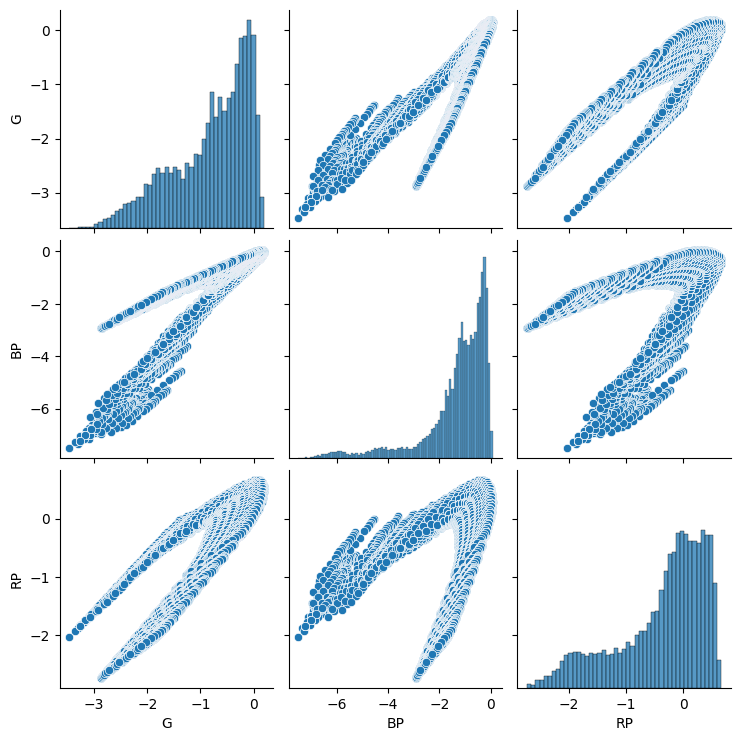

In [52]:
sns.pairplot(df.loc[mask], vars=["G", "BP", "RP"]);

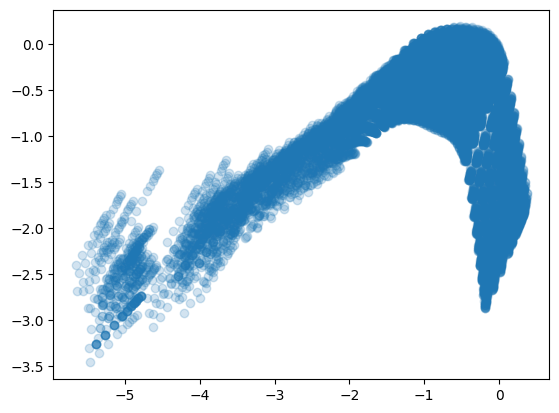

In [53]:
fig, ax = plt.subplots()

ax.scatter(df.loc[mask, "BP"] - df.loc[mask, "RP"], df.loc[mask, "G"], alpha=0.2)

In [22]:
from scipy.interpolate import LinearNDInterpolator

In [23]:
points = df.loc[mask, ['Teff', 'logg', '[Fe/H]', 'Av']].to_numpy()
values = df.loc[mask, ['G', 'BP', 'RP']].to_numpy()

bc_interp = LinearNDInterpolator(points, values)

In [29]:
%%timeit
bc_interp(2500.0, 2.5, -0.75, 0.025)

2.02 ms ± 1.49 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [54]:
from sklearn.decomposition import PCA

In [141]:
num_comp = 6
pca = PCA(num_comp)

In [142]:
X = df.loc[mask, ['J', 'H', 'K', 'G', 'BP', 'RP', 'g', 'r', 'i']].to_numpy()
pca.fit(X)

PCA(n_components=6)

In [143]:
print(pca.explained_variance_ratio_)

[5.77618113e-01 4.17923756e-01 3.23084050e-03 8.08389731e-04
 2.56295539e-04 8.52157282e-05]


In [144]:
Y = pca.transform(X[::10])

/home/alex/miniconda3/envs/isochrones/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


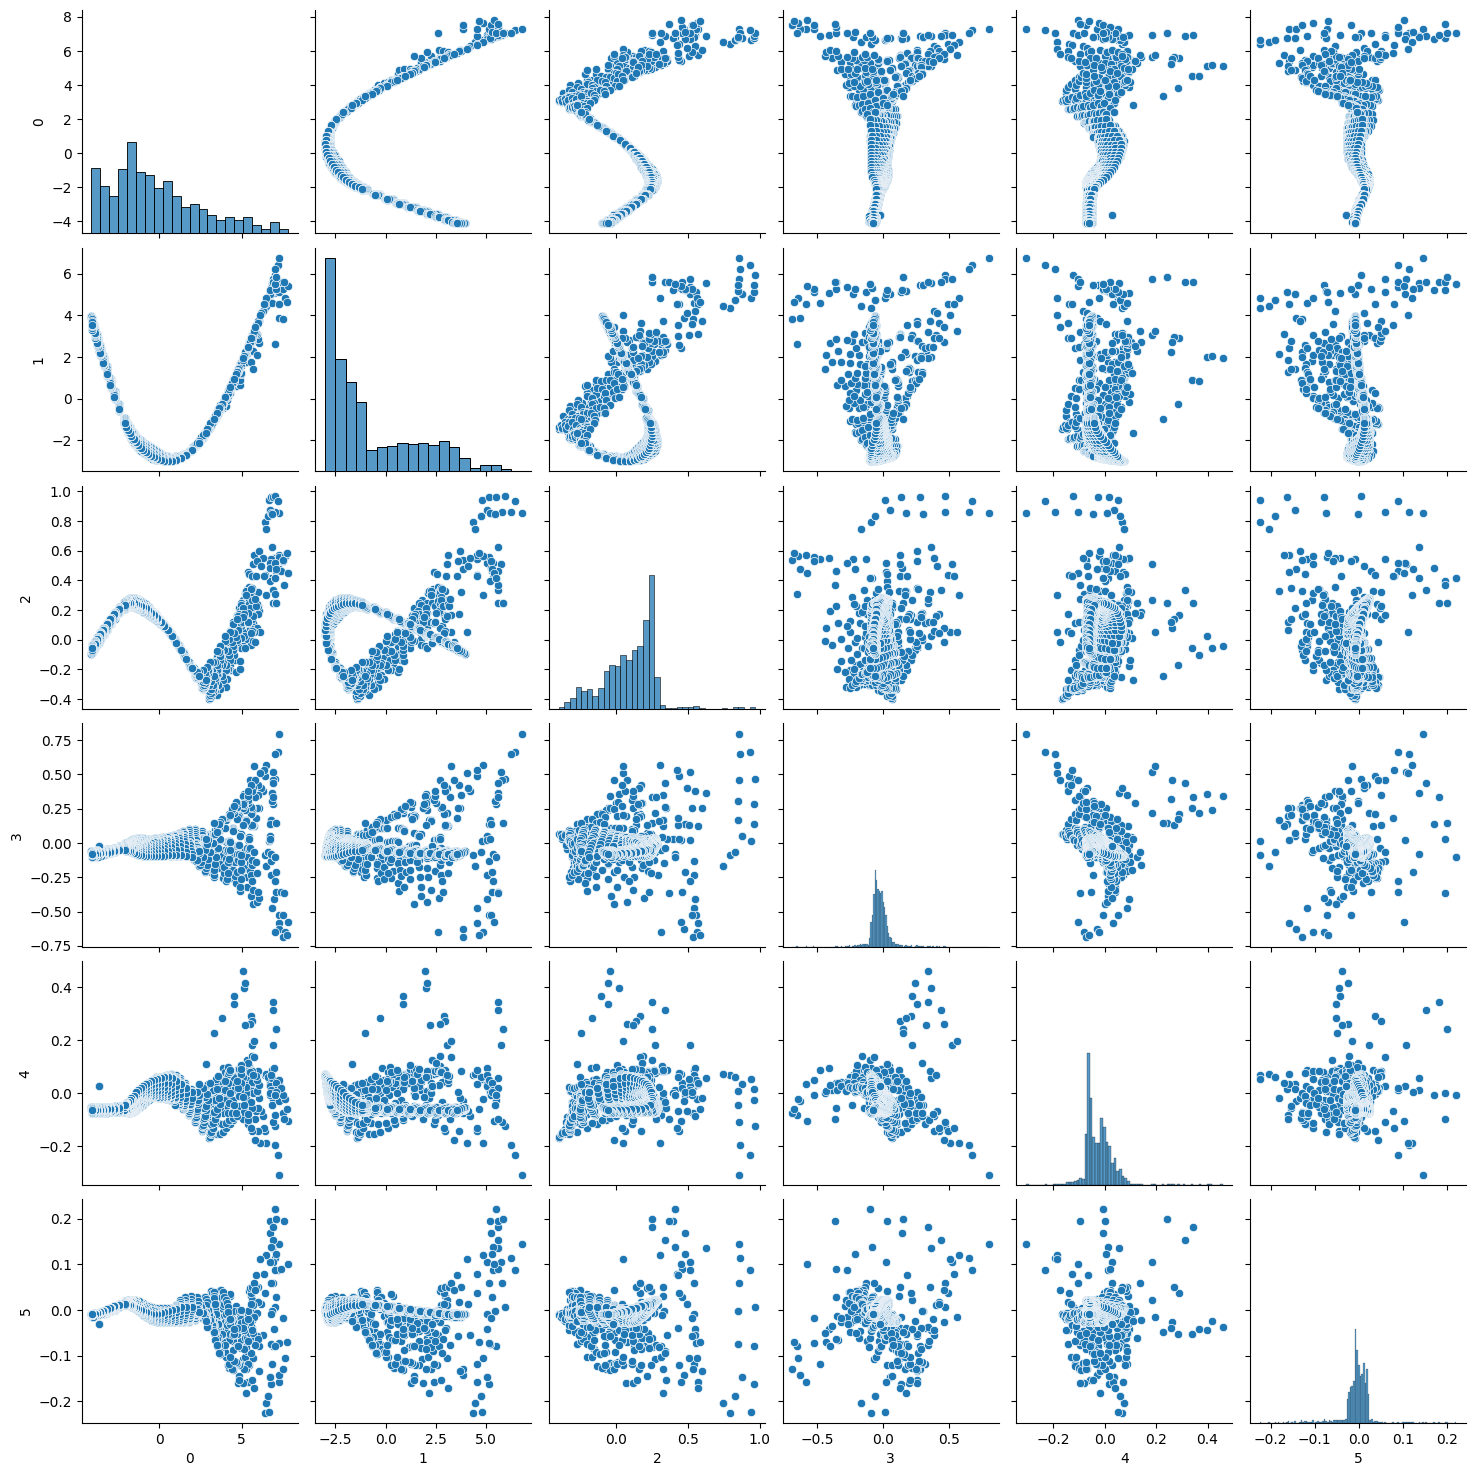

In [145]:
sns.pairplot(pd.DataFrame(Y))

In [146]:
Xp = pca.inverse_transform(Y)

In [147]:
dfx = pd.DataFrame(X[::10])
dfx["label"] = "data"

dfxp = pd.DataFrame(Xp)
dfxp["label"] = "pca"

dfx = pd.concat([dfx, dfxp], ignore_index=True)
del dfxp

/home/alex/miniconda3/envs/isochrones/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


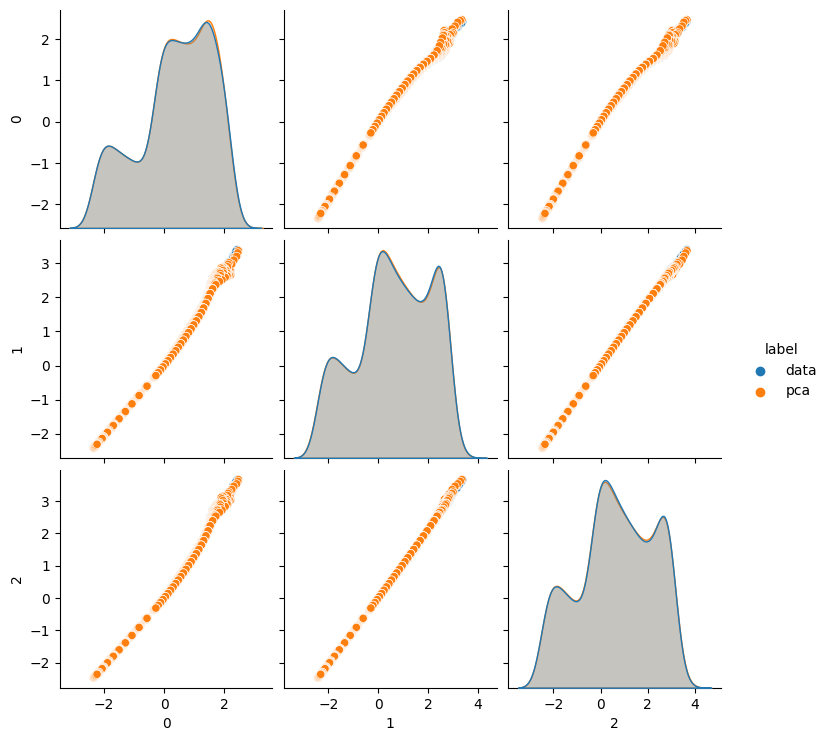

In [148]:
sns.pairplot(dfx, vars=list(range(3)), hue="label");

(array([2.000e+00, 1.000e+00, 0.000e+00, 2.000e+00, 5.000e+00, 3.000e+00,
        4.000e+00, 7.000e+00, 4.000e+00, 6.000e+00, 7.000e+00, 7.000e+00,
        1.300e+01, 1.500e+01, 3.200e+01, 8.200e+01, 1.190e+02, 3.090e+02,
        1.300e+03, 3.105e+03, 7.133e+03, 4.238e+03, 7.220e+02, 1.460e+02,
        9.700e+01, 9.200e+01, 5.500e+01, 5.700e+01, 3.700e+01, 1.300e+01,
        5.000e+00, 6.000e+00, 3.000e+00, 5.000e+00, 1.000e+00, 2.000e+00,
        3.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([-0.13125208, -0.12485259, -0.1184531 , -0.11205362, -0.10565413,
        -0.09925464, -0.09285515, -0.08645566, -0.08005617, -0.07365668,
        -0.06725719, -0.06085771, -0.05445822, -0.04805873, -0.04165924,
        -0.03525975, -0.02886026, -0.02246077, -0.01606128, -0.0096618 ,
        -0.00326231,  0.00313718,  0.00953667,  0.01593616,  0.02233565,
         0.02873514,  0.03513463,  0.04153411,  0.0479336 ,  0.05433309,
         0.06073258,  0.06713207,  0.07353156,  0.07993105,  0.0

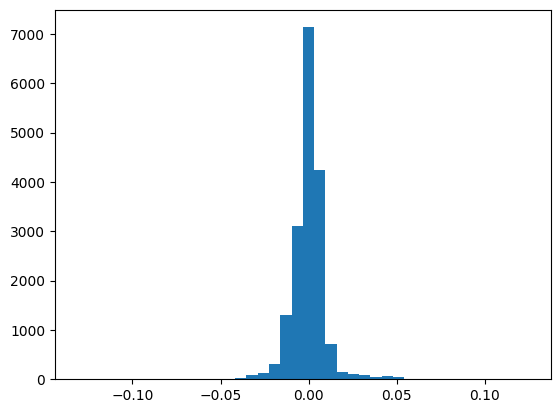

In [149]:
plt.hist((X[::10] - Xp).ravel(), bins=40)

In [150]:
(X[::10] - Xp).std()

0.010795477132246817

In [151]:
from scipy.stats import median_abs_deviation

In [152]:
median_abs_deviation(X[::10] - Xp)

array([0.00251826, 0.00514023, 0.00537648, 0.00375386, 0.00333437,
       0.00626101, 0.00126802, 0.00137884, 0.00304968])

In [153]:
from sklearn.ensemble import RandomForestRegressor

In [190]:
rforest = RandomForestRegressor()

In [191]:
X_train = df.loc[mask, ['Teff', 'logg', '[Fe/H]', 'Av']].sample(frac=0.8)
X_test = df.loc[mask, ['Teff', 'logg', '[Fe/H]', 'Av']].drop(X_train.index)

y_train = df.loc[X_train.index, 'G']
y_test = df.loc[X_test.index, 'G']

rforest.fit(X_train, y_train)

RandomForestRegressor(n_estimators=500)

In [192]:
y_pred = rforest.predict(X_test)

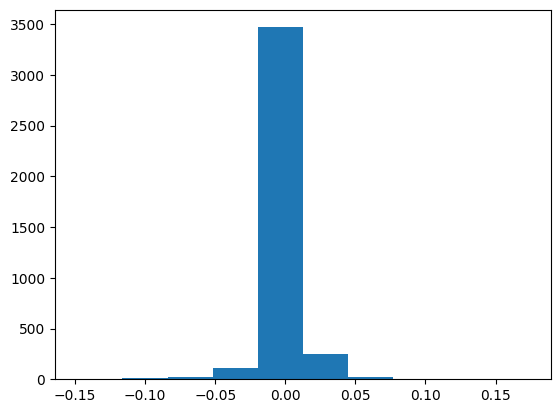

In [193]:
plt.hist(y_test - y_pred);

In [194]:
(y_test - y_pred).std()

0.016104763559797803

In [195]:
median_abs_deviation(y_test - y_pred)

0.003514119999999843